# Classification on Wine Dataset

### Dataset description

We will be working with a dataset on wines from the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine). It contains data for 178 instances. 
The dataset is the results of a chemical analysis of wines grown in the same region
in Italy but derived from three different cultivars. The analysis determined the
quantities of 13 constituents found in each of the three types of wines. 

### The features in the dataset are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
-Proline



We first import all the packages that are needed

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
from scipy import stats
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing

# Perceptron
We will implement the perceptron and use it to learn a halfspace with 0-1 loss.

**TO DO** Set the random seed to your ID (matricola).

In [ ]:
IDnumber = 2019157

np.random.seed(IDnumber)

Load the dataset from scikit learn and then split in training set and test set (50%-50%) after applying a random permutation to the datset.

In [ ]:
# Load the dataset from scikit learn
wine = datasets.load_wine()

m = wine.data.shape[0]
permutation = np.random.permutation(m)

X = wine.data[permutation]
Y = wine.target[permutation]

We are going to classify class "1" vs the other two classes (0 and 2). We are going to relabel the other classes (0 and 2) as "-1" so that we can use it directly with the perceptron.

In [ ]:
#let's relabel classes 0 and 2 as -1
for i in range(len(Y)):
    if Y[i] != 1:
        Y[i] = -1

**TO DO** Divide the data into training set and test set (50% of the data each)

In [ ]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.

#m_training needs to be the number of samples in the training set
m_training = int(m/2)

#m_test needs to be the number of samples in the test set
m_test = m-m_training

num_elem_class1=0;
iteration=0
while num_elem_class1<10 or num_elem_class1>(m_training -10):  #permute if there aren't at least 10 elements of each class from class 1 and at least 10 elements
    if iteration>0:
        X = X[permutation]
        Y = Y[permutation]
    #X_training = instances for training set
    X_training = X[:m_training,:]
    #Y_training = labels for the training set
    Y_training = Y[:m_training]
    #X_test = instances for test set
    X_test = X[m_test:,:]
    #Y_test = labels for the test set
    Y_test = Y[m_test:]
    iteration+=1
    num_elem_class1=np.count_nonzero(Y_training==1)

print(Y_training) #to make sure that Y_training contains both 1 and -1

[-1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1
 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1 -1  1 -1  1  1  1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1]


Now add a 1 in front of each sample so that we can use a vector to describe all the coefficients of the model. You can use the function $hstack$ in $numpy$

In [ ]:
#add a 1 to each sample
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where 1 iteration corresponds to 1 update of the perceptron weights. If the perceptron returns because the maximum number of iterations has been reached, you should return an appropriate model. 

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of missclassified samples for the best model

In [ ]:
def perceptron(X, Y, max_num_iterations):
    best_error=n_samples=Y.shape[0]   
    W=np.zeros(X.shape[1])                 
    W_next=W.copy()
    for t in range(max_num_iterations):
        loss_t=0
        for i in range(n_samples):
            if Y[i]*np.dot(W,X[i]) <= 0:
                loss_t+=1
                W_next+=np.dot(Y[i],X[i]) #update the next w that will be used in the next iteration
        if loss_t==0:
            return W, loss_t/n_samples    #loss is 0
        if loss_t<best_error:             #if I find a better W I update the values
            best_w=W.copy()
            best_error=loss_t
        W=W_next.copy()       
    return best_w, best_error/n_samples

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [ ]:
#now run the perceptron for 100 iterations
w_found, training_error = perceptron(X_training,Y_training, 100)
print("Training error with 100 iterations: "+str(training_error))
print("\nW: ",w_found)

Training error with 100 iterations: 0.2696629213483146

W:  [  528.     5604.22    258.96    948.56  10887.6   41557.     1187.77
  1356.12    207.54   1024.32  -1131.47    688.588  1760.31  -6451.   ]


Use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of missclassified samples in the test set (that is an estimate of the true loss).

In [ ]:
#now use the w_found to make predictions on test dataset

#num_errors = number of errors in the test set
num_errors = 0.

for i in range(m_test):
    if Y_test[i]*np.dot(w_found,X_test[i])<=0:
        num_errors+=1
        
true_loss_estimate = num_errors/m_test

#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Estimated true loss with 100 iterations:"+str(true_loss_estimate),"\nnumber=",num_errors)

Estimated true loss with 100 iterations:0.2696629213483146 
number= 24.0


**TO DO**: what relation do you observe between the training error and the (estimated) true loss? Is this what you expected? Explain what you observe and why it does or does not conform to your expectations.

**ANSWER**: 
I expected a true loss greater than the training error but the result is that they are equal with this pseudo-random permutation generated with my IDnumber.
At the beginning I tought that there was a problem into the code but I didn't find anything wrong
so I decided to try with an other IDnumber (for example with 1) and I saw something that I expected.

The result shows only that the best_w returned by the Perceptron misclassified the exact number of samples in both the sets.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 10000 iterations. 

In [ ]:
#now run the perceptron for 10000 iterations here!

w_found, training_error = perceptron(X_training,Y_training, 10000)
print(w_found)

#training_error = error on the training set
print("Training error with 10000 iterations: "+str(training_error))

#num_errors = number of errors in the test set
num_errors = 0.

for i in range(m_test):
    if Y_test[i]*np.dot(w_found,X_test[i])<=0:
        num_errors+=1

true_loss_estimate = num_errors/m_test

#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Estimated true loss with 10000 iterations:"+str(true_loss_estimate))

[  15680.           84870.54000007 -161316.93999996   -4408.92
   26464.5         131157.           85243.64999998  156318.44000005
    -875.24         79311.16999998 -469919.92999993   62882.43800005
  159537.4600001   -16195.        ]
Training error with 10000 iterations: 0.21348314606741572
Estimated true loss with 10000 iterations:0.2247191011235955


Now the Estimated true loss is a little bit greater than the Training error and both are less than before.
This means that using 10e5 iterations allow us to have a better W than before avoiding overfitting.


# Logistic Regression
Now we use logistic regression, as implemented in Scikit-learn, to predict labels. We first do it for 2 labels and then for 3 labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [ ]:
# Load the dataset from scikit learn
wine = datasets.load_wine()

m = wine.data.shape[0]
permutation = np.random.permutation(m)

X = wine.data[permutation]
Y = wine.target[permutation]

As for the previous part, divide the data into training and test (50%-50%), relabel classes 0 and 2 as -1. Here there is no need to add a 1 at the beginning of each row, since it will be done automatically by the function we will use.

In [ ]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

for i in range(len(Y)):
    if Y[i] != 1:
        Y[i] = -1
        
#m_training needs to be the number of samples in the training set
m_training = int(m/2)

#m_test needs to be the number of samples in the test set
m_test = m-m_training

num_elem_class1=0;
iteration=0
while num_elem_class1<10 or num_elem_class1>(m_training -10):
    if iteration>0:
        X = X[permutation]
        Y = Y[permutation]
    #X_training = instances for training set
    X_training = X[:m_training,:]
    #Y_training = labels for the training set
    Y_training = Y[:m_training]
    #X_test = instances for test set
    X_test = X[m_test:,:]
    #Y_test = labels for the test set
    Y_test = Y[m_test:]
    iteration+=1
    num_elem_class1=np.count_nonzero(Y_training==1)

print(Y_training) #to make sure that Y_training contains both 1 and -1
print("Number of element from class 1: ",num_elem_class1,"\nNumber of element from class 2: ",m_training-num_elem_class1,"\nNumber of extra Permutation done: ",iteration-1)

[-1 -1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1
 -1 -1  1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1]
Number of element from class 1:  32 
Number of element from class 2:  57 
Number of extra Permutation done:  0


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples missclassified in the training set and in the test set.

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_training)
X_training = scaler.transform(X_training)
X_test =scaler.transform(X_test)

#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5)

#learn from training set
logreg.fit(X_training,Y_training)

#predict on training set
Y_train_predicted=logreg.predict(X_training)

error_rate_training=np.count_nonzero(Y_train_predicted*Y_training<0)/m_training
#print the error rate = fraction of missclassified samples
print("Error rate on training set: "+str(error_rate_training))

#predict on test set
Y_test_predicted=logreg.predict(X_test)

#print the error rate = fraction of missclassified samples
error_rate_test=np.count_nonzero(Y_test_predicted*Y_test<0)/m_test
print("Error rate on test set: "+str(error_rate_test))

Error rate on training set: 0.0
Error rate on test set: 0.056179775280898875


Now we do logistic regression for classification with 3 classes.

First: let's load the data once again (with the same permutation from before).

In [ ]:
#part on logistic regression for 3 classes
#Divide in training and test: make sure that your training set
#contains at least 10 elements from each of the 3 classes!
#If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.
X = wine.data[permutation]
Y = wine.target[permutation]

#m_training needs to be the number of samples in the training set
m_training = int(m/2)

#m_test needs to be the number of samples in the test set
m_test = m-m_training

num_elem_class1=num_elem_class2=0;
iteration=0
while num_elem_class1<10 or num_elem_class2<10 or (m_training -10)<(num_elem_class1+num_elem_class2):
    if iteration>0:
        X = X[permutation]
        Y = Y[permutation]
    #X_training = instances for training set
    X_training = X[:m_training,:]
    #Y_training = labels for the training set
    Y_training = Y[:m_training]
    #X_test = instances for test set
    X_test = X[m_test:,:]
    #Y_test = labels for the test set
    Y_test = Y[m_test:]
    iteration+=1
    num_elem_class1=np.count_nonzero(Y_training==1)
    num_elem_class2=np.count_nonzero(Y_training==2)
    
print(Y_training) #to make sure that Y_training contains both 1 and -1
print("Number of element from class 1: ",num_elem_class1,"\nNumber of element from class 2: ",num_elem_class2,"\nNumber of element from class 3: ",m_training-num_elem_class1-num_elem_class2,"\nNumber of extra Permutation done: ",iteration-1)

[0 0 1 1 1 1 1 1 2 2 1 1 1 2 1 1 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 1 0 1 0 2 1
 0 0 1 0 0 1 1 0 0 0 1 0 2 1 1 1 0 0 1 1 1 1 0 1 2 0 0 2 2 0 1 0 0 2 0 0 1
 1 0 2 2 2 2 1 1 2 1 0 0 2 0 2]
Number of element from class 1:  32 
Number of element from class 2:  23 
Number of element from class 3:  34 
Number of extra Permutation done:  0


**TO DO** Now perform logistic regression (instructions as before) for 3 classes, learning a model from the training set and predicting on the test set. Print the fraction of missclassified samples on the training set and the fraction of missclassified samples on the test set.

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_training)
X_training = scaler.transform(X_training)
X_test =scaler.transform(X_test)
#part on logistic regression for 3 classes
logreg = linear_model.LogisticRegression(C=1e5)

#learn from training set
logreg.fit(X_training,Y_training)

#predict on training set
Y_train_predicted=logreg.predict(X_training)

error_rate_training=np.count_nonzero(Y_train_predicted!=Y_training)/m_training

#print the error rate = fraction of missclassified samples
print("Error rate on training set: "+str(error_rate_training))

#predict on test set
Y_test_predicted=logreg.predict(X_test)

error_rate_test=np.count_nonzero(Y_test_predicted!=Y_test)/m_test
#print the error rate = fraction of missclassified samples
print("Error rate on test set: "+str(error_rate_test))
print(logreg.coef_)

Error rate on training set: 0.0
Error rate on test set: 0.056179775280898875
[[ 2.8586091   1.10380231  1.52290945 -1.7385881   1.6334427   0.99767725
   1.41830737 -0.19186847 -0.25109334  0.17295323 -0.37103715  2.7817225
   4.57232343]
 [-3.97226699 -1.46996953 -1.62943567  1.1658311  -0.93811309 -1.59701028
   0.92968253 -0.3329637   1.65402821 -2.9644227   2.39377896 -0.01682723
  -4.28647922]
 [ 1.11365789  0.36616722  0.10652623  0.572757   -0.69532961  0.59933302
  -2.3479899   0.52483217 -1.40293487  2.79146948 -2.02274181 -2.76489527
  -0.28584421]]


Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test.

In [ ]:
#to make the plot we need to reduce the data to 2D, so we choose two features

features_list = ['Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline']
labels_list = ['class_0', 'class_1', 'class_2']

index_feature1 = 1
index_feature2 = 2
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

#X_red is X reduced to include only the 2 features of
#indices index_feature1 and index_feature2
X_red = X[:,features]

X_red_training = X_red[:m_training,:]
Y_training = Y[:m_training]

X_red_test =X_red[m_test:,:]
Y_test =  Y[m_test:]

Now learn a model using the training data.

In [ ]:
#ADD CODE! (only for learning from training data)
logreg = linear_model.LogisticRegression(C=1e5)

#learn from training set
logreg.fit(X_red_training,Y_training)


LogisticRegression(C=100000.0)

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

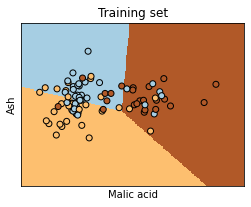

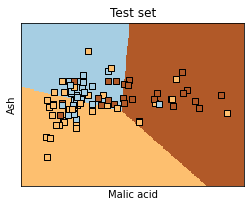

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X_red[:, 0].min() - .5, X_red[:, 0].max() + .5
y_min, y_max = X_red[:, 1].min() - .5, X_red[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_red_training[:, 0], X_red_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_red_test[:, 0], X_red_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()